In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer


Información del DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unnamed: 0    18249 non-null  int64  
 1   date          18249 non-null  object 
 2   averageprice  18249 non-null  float64
 3   totalvolume   18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   totalbags     18249 non-null  float64
 8   smallbags     18249 non-null  float64
 9   largebags     18249 non-null  float64
 10  xlargebags    18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None

Primeros datos
   unnamed: 0        date  averageprice  totalvolume     4046       4225  \
0           0  20

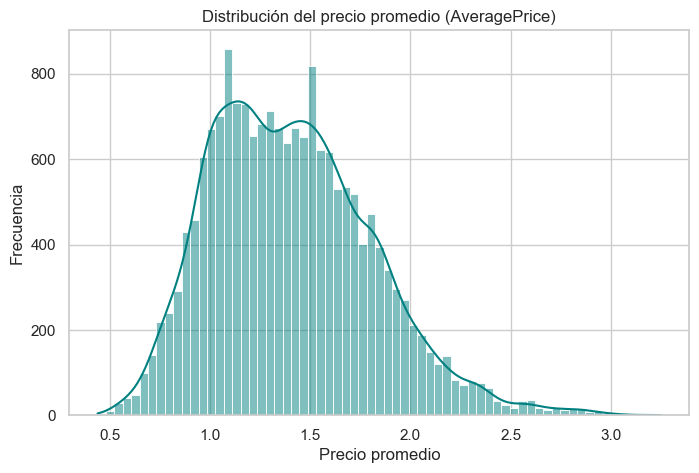

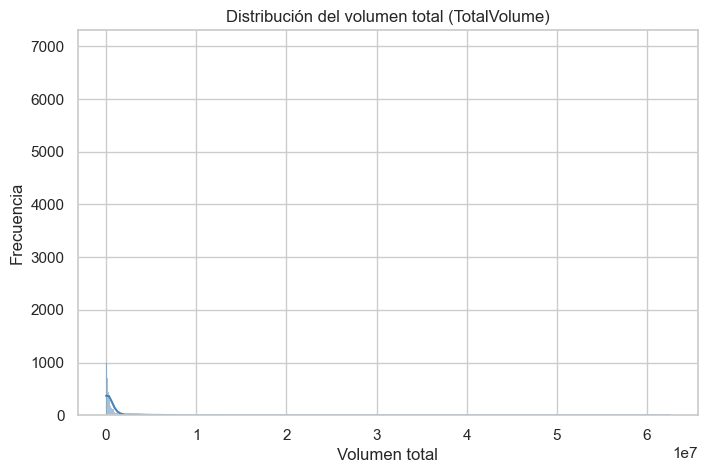

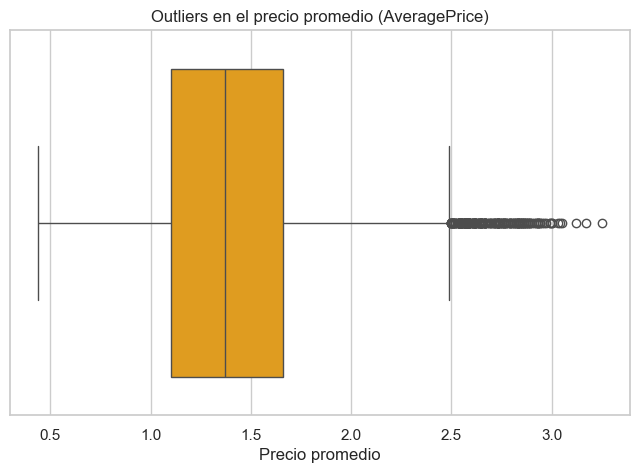

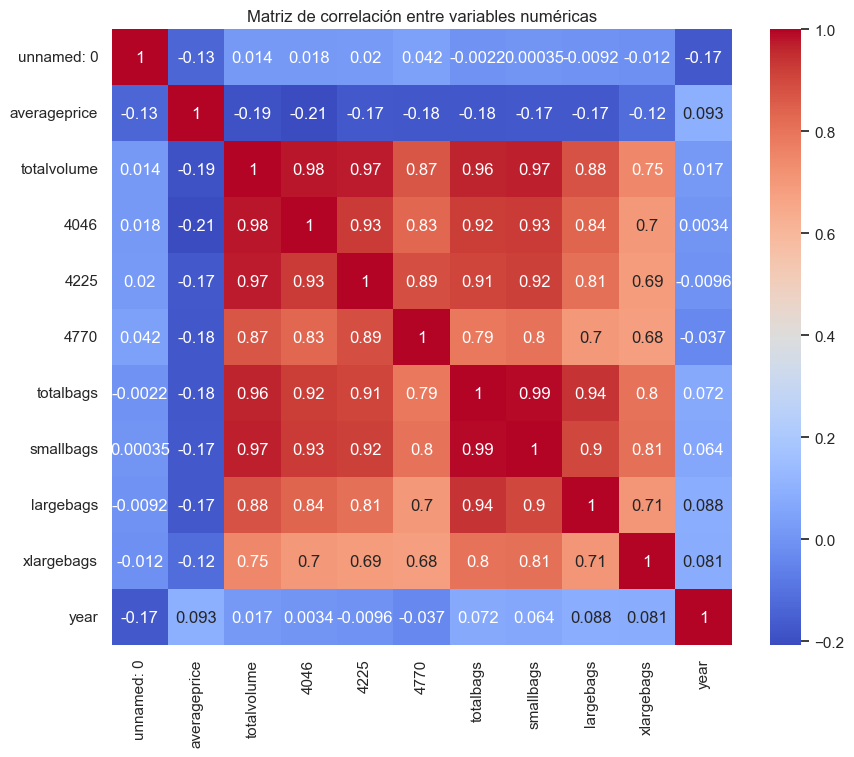

C:\Users\User\AppData\Local\Temp\ipykernel_9080\3255925374.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y="averageprice", data=df, palette="pastel")


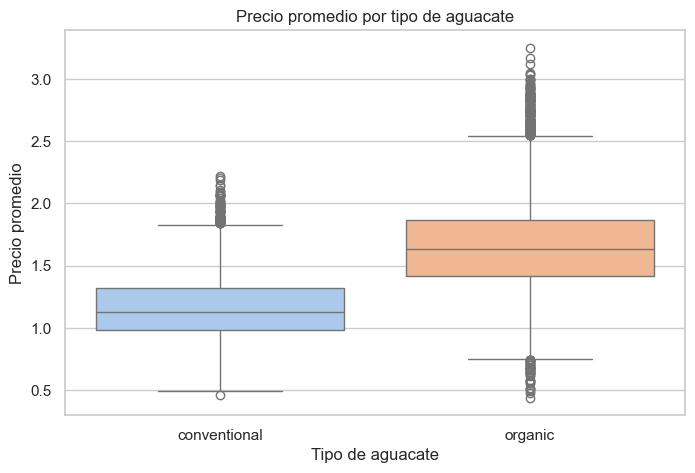

C:\Users\User\AppData\Local\Temp\ipykernel_9080\3255925374.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")
C:\Users\User\AppData\Local\Temp\ipykernel_9080\3255925374.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")


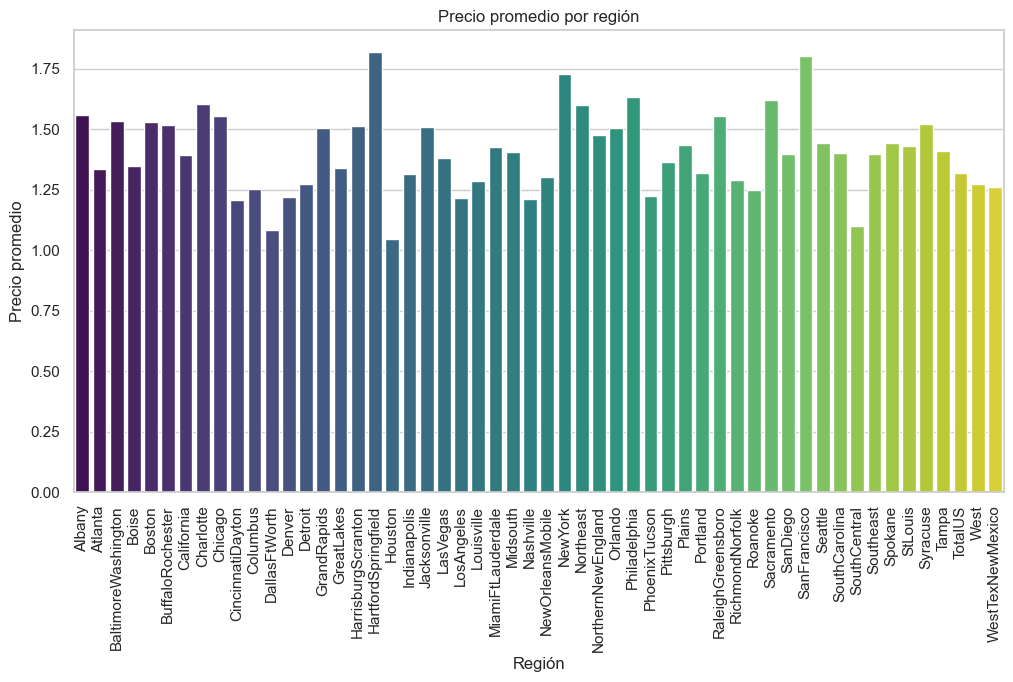

In [10]:
CSV_PATH = "avocado.csv"

df = pd.read_csv(CSV_PATH)
df.columns = [col.strip().lower() for col in df.columns]  # limpiar nombres de columnas

print("\nInformación del DataFrame")
print(df.info())
print("\nPrimeros datos")
print(df.head())
print("\nDescripción estadística")
print(df.describe())
print("\nNulos por columna")
print(df.isnull().sum())
print("\nduplicados por columna")
print(f"Filas duplicadas: {df.duplicated().sum()}")

sns.set_theme(style="whitegrid")


plt.figure(figsize=(8,5))
sns.histplot(df["averageprice"], kde=True, color="teal")
plt.title("Distribución del precio promedio (AveragePrice)")
plt.xlabel("Precio promedio")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df["totalvolume"], kde=True, color="steelblue")
plt.title("Distribución del volumen total (TotalVolume)")
plt.xlabel("Volumen total")
plt.ylabel("Frecuencia")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x=df["averageprice"], color="orange")
plt.title("Outliers en el precio promedio (AveragePrice)")
plt.xlabel("Precio promedio")
plt.show()


plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


plt.figure(figsize=(8,5))
sns.boxplot(x="type", y="averageprice", data=df, palette="pastel")
plt.title("Precio promedio por tipo de aguacate")
plt.xlabel("Tipo de aguacate")
plt.ylabel("Precio promedio")
plt.show()


plt.figure(figsize=(12,6))
sns.barplot(x="region", y="averageprice", data=df, ci=None, palette="viridis")
plt.xticks(rotation=90)
plt.title("Precio promedio por región")
plt.xlabel("Región")
plt.ylabel("Precio promedio")
plt.show()



Tamaño original del dataset: (18249, 14)

Valores nulos por columna antes de limpiar:
unnamed: 0      0
date            0
averageprice    0
totalvolume     0
4046            0
4225            0
4770            0
totalbags       0
smallbags       0
largebags       0
xlargebags      0
type            0
year            0
region          0
dtype: int64

Valores nulos después de limpieza:
unnamed: 0      0
date            0
averageprice    0
totalvolume     0
4046            0
4225            0
4770            0
totalbags       0
smallbags       0
largebags       0
xlargebags      0
type            0
year            0
region          0
dtype: int64

Tamaño después de eliminar outliers: (15770, 14)

Columnas tras convertir categóricas:
Index(['unnamed: 0', 'date', 'averageprice', 'totalvolume', '4046', '4225',
       '4770', 'totalbags', 'smallbags', 'largebags', 'xlargebags', 'year',
       'type_organic', 'region_Atlanta', 'region_BaltimoreWashington',
       'region_Boise', 'region_Boston

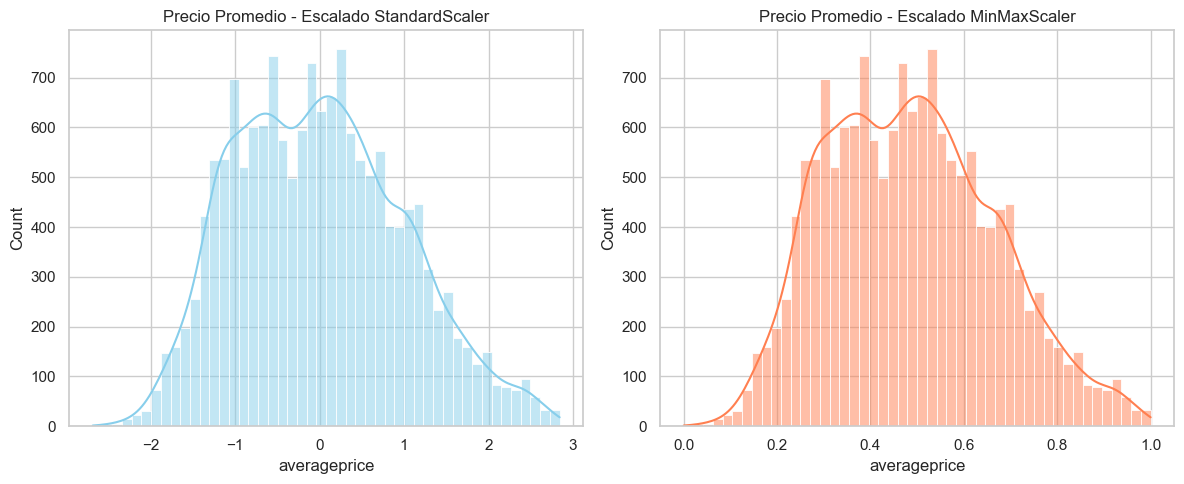

In [11]:

CSV_PATH = "avocado.csv"
df = pd.read_csv(CSV_PATH)
df.columns = [col.strip().lower() for col in df.columns]

print("Tamaño original del dataset:", df.shape)
print("\nValores nulos por columna antes de limpiar:")
print(df.isnull().sum())
df = df.dropna(subset=["averageprice", "totalvolume", "region", "type"])
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

print("\nValores nulos después de limpieza:")
print(df.isnull().sum())


def quitar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    return df_filtrado
df = quitar_outliers(df, "averageprice")
df = quitar_outliers(df, "totalvolume")

print("\nTamaño después de eliminar outliers:", df.shape)
df = pd.get_dummies(df, columns=["type", "region"], drop_first=True)

print("\nColumnas tras convertir categóricas:")
print(df.columns)


scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

num_cols = df.select_dtypes(include=[np.number]).columns
df_standard = df.copy()
df_minmax = df.copy()

df_standard[num_cols] = scaler_std.fit_transform(df_standard[num_cols])
df_minmax[num_cols] = scaler_minmax.fit_transform(df_minmax[num_cols])

print("\n Normalización completada.")


fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df_standard["averageprice"], kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Precio Promedio - Escalado StandardScaler")

sns.histplot(df_minmax["averageprice"], kde=True, color="coral", ax=axes[1])
axes[1].set_title("Precio Promedio - Escalado MinMaxScaler")
plt.tight_layout()
plt.show()


# 3. Modelos Predictivos


## Regresion

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score

##### Regresion Lineal

In [99]:
df = pd.read_csv("avocado.csv")
df.head()


,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### Preparación de datos para modelos de regresión

In [100]:
X = df.drop(columns=['AveragePrice', 'Date', 'type', 'region', 'Unnamed: 0'])
y = df['AveragePrice']



In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=100
)

In [93]:
print(f"Datos de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba: {X_test.shape}, {y_test.shape}")

Datos de entrenamiento: (12774, 9), (12774,)
Datos de prueba: (5475, 9), (5475,)


In [94]:
modelo_lin = LinearRegression()
modelo_lin.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [95]:
y_pred_lin = modelo_lin.predict(X_test)

In [96]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

In [98]:
print("\n📉 Resultados del modelo de Regresión Lineal:")
print(f"Error cuadrático medio (MSE): {mse_lin:.4f}")
print(f"Coeficiente R²: {r2_lin:.4f}")

# Interpretación del R²
if r2_lin > 0.8:
    print("✅ Excelente ajuste del modelo")
elif r2_lin > 0.6:
    print("✓ Buen ajuste del modelo")
elif r2_lin > 0.4:
    print("⚠️ Ajuste moderado del modelo")
else:
    print("❌ Ajuste pobre del modelo - considerar otras variables o modelos")


📉 Resultados del modelo de Regresión Lineal:
Error cuadrático medio (MSE): 0.1544
Coeficiente R²: 0.0621
❌ Ajuste pobre del modelo - considerar otras variables o modelos


In [44]:
df_pred_lin = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lin,
    'Error': y_test - y_pred_lin
})

In [102]:
df_pred_lin.head(10)

,Actual,Predicted,Error
17091,2.03,1.457414,0.572586
9441,1.48,1.386016,0.093984
15443,1.75,1.480319,0.269681
10982,1.90,1.384734,0.515266
2671,1.05,0.630783,0.419217
11702,1.91,1.383941,0.526059
14611,1.50,1.418918,0.081082
1981,1.01,1.382085,-0.372085
9284,0.87,1.383743,-0.513743
2143,0.93,1.373783,-0.443783


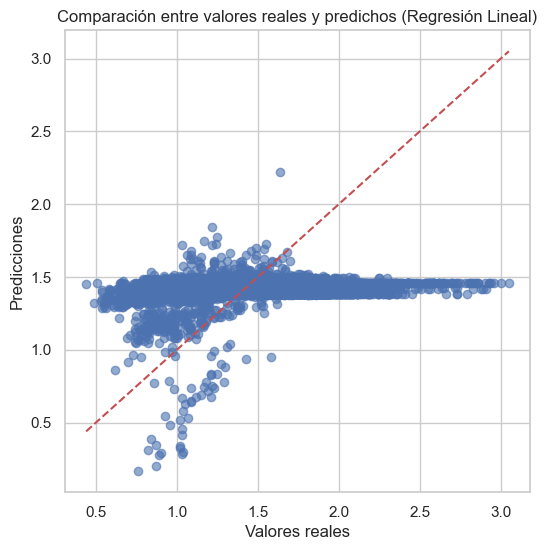

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lin, alpha=0.6)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos (Regresión Lineal)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

**Este esta malito xd toca corregirlo bien todo porque no esta haciendo la prediccion bien**

##### Random Forest Regressor

In [54]:
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
# 7️⃣ Hacer predicciones con Random Forest
y_pred_rf = modelo_rf.predict(X_test)

In [56]:
# 8️⃣ Evaluar el modelo Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [57]:
print("\n🌳 Resultados del modelo Random Forest:")
print(f"Error cuadrático medio (MSE): {mse_rf:.4f}")
print(f"Coeficiente R²: {r2_rf:.4f}")


🌳 Resultados del modelo Random Forest:
Error cuadrático medio (MSE): 0.0319
Coeficiente R²: 0.8060


In [60]:
df_pred_forest = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_rf,
    'Error': y_test - y_pred_rf
})

In [61]:
df_pred_forest.head(10)

,Actual,Predicted,Error
17091,2.03,1.6240,0.4060
9441,1.48,1.6739,-0.1939
15443,1.75,1.6488,0.1012
10982,1.90,1.8343,0.0657
2671,1.05,1.0103,0.0397
11702,1.91,1.6857,0.2243
14611,1.50,1.4318,0.0682
1981,1.01,1.0057,0.0043
9284,0.87,1.4713,-0.6013
2143,0.93,1.0280,-0.0980


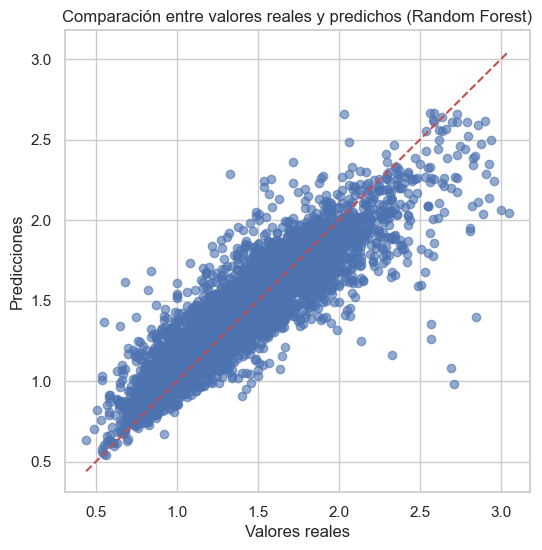

In [63]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

**Este si esta mas bonito, aunque hay que verificar toda la info por si acaso, esto porque al hacerlo se utilizo mucha ayuda externa xd entonces comprobar** 

##### MLPRegressor

In [111]:
from sklearn.neural_network import MLPRegressor

In [70]:
modelo_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelo_mlp.fit(X_train, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True


In [71]:
y_pred_mlp = modelo_mlp.predict(X_test)

In [72]:
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

In [73]:
print("\n🧠 Resultados del modelo MLPRegressor (red neuronal):")
print(f"Error cuadrático medio (MSE): {mse_mlp:.4f}")
print(f"Coeficiente R²: {r2_mlp:.4f}")


🧠 Resultados del modelo MLPRegressor (red neuronal):
Error cuadrático medio (MSE): 1287465.3797
Coeficiente R²: -7821918.4487


**Este si esta horrible**

In [77]:
# Comparar resultados
print("\nComparación de modelos:")
print(f"Regresión Lineal -> R²: {r2_lin:.4f} | MSE: {mse_lin:.4f}")
print(f"Random Forest -> R²: {r2_rf:.4f} | MSE: {mse_rf:.4f}")
print(f"MLP Regressor -> R²: {r2_mlp:.4f} | MSE: {mse_mlp:.4f}")


Comparación de modelos:
Regresión Lineal -> R²: 0.0621 | MSE: 0.1544
Random Forest -> R²: 0.8060 | MSE: 0.0319
MLP Regressor -> R²: -7821918.4487 | MSE: 1287465.3797


In [14]:
df_pred = pd.DataFrame({
    'Actual': y_test,
    'Pred_RF': y_pred_rf,
    'Pred_MLP': y_pred_mlp
    })

NameError: name 'y_test' is not defined

In [81]:
df_pred.head(10)

,Actual,Pred_RF,Pred_MLP
17091,2.03,1.6240,-11.492790
9441,1.48,1.6739,55.037992
15443,1.75,1.6488,5.297126
10982,1.90,1.8343,77.044008
2671,1.05,1.0103,-1340.440522
11702,1.91,1.6857,-17.565683
14611,1.50,1.4318,-991.534579
1981,1.01,1.0057,87.253190
9284,0.87,1.4713,1.135395
2143,0.93,1.0280,-826.496135


# XDDDDDD

### 💡 Nota sobre Clasificación vs Regresión

**Importante:** El problema que estamos resolviendo es de **REGRESIÓN** (predecir valores continuos como el precio promedio de aguacates), NO de clasificación.

Por lo tanto:
- ✅ Usamos: `LinearRegression`, `RandomForestRegressor`, `MLPRegressor`, `KNeighborsRegressor`, `SVR`
- ❌ NO usamos: `KNeighborsClassifier`, `SVC`, `DecisionTreeClassifier` (estos son para clasificación)

## Clasificacion

In [3]:
import pandas as pd

df = pd.read_csv("avocado.csv")
df.head()


,Unnamed: 0,Date,AveragePrice,TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### K-Nearest Neighbors Regressor (KNN)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_train, y_train)

y_pred_knn = modelo_knn.predict(X_test)
print(f"Precisión KNN: {accuracy_score(y_test, y_pred_knn)}")

NameError: name 'X_train' is not defined

In [4]:
cm = confusion_matrix(y_test, y_pred_knn)

# ejemplo del profesor
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['setosa', 'versicolor', 'virginica'], yticklabels=['setosa', 'versicolor', 'virginica'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

NameError: name 'accuracy' is not defined

In [ ]:
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')

df_metrics['KNN'] = [knn_accuracy, knn_f1, knn_precision, knn_recall]
df_metrics

### Arboles de decision xd

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
# b. Árboles de Decisión
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train_class, y_train_class)
y_pred_dt = model_dt.predict(X_test_class)

print("\n🌲 Resultados Árboles de Decisión:")
print("Accuracy:", accuracy_score(y_test_class, y_pred_dt))
print(classification_report(y_test_class, y_pred_dt, target_names=le_type.classes_))

NameError: name 'DecisionTreeClassifier' is not defined

### Support Vector Machine (SVM)

In [85]:
from sklearn.svm import SVC

In [ ]:
from sklearn.svm import SVC

modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)

y_pred_svm = modelo_svm.predict(X_test)
print(f"Precisión SVM: {accuracy_score(y_test, y_pred_svm)}")

NameError: name 'X_train_class' is not defined

In [ ]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')
svm_precision = precision_score(y_test, y_pred_svm, average='weighted')
svm_recall = recall_score(y_test, y_pred_svm, average='weighted')

df_metrics['SVM'] = [svm_accuracy, svm_f1, svm_precision, svm_recall]
df_metrics

## Agrupamiento (Clustering)

### K-Means

In [8]:
from sklearn.cluster import KMeans


In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

kmeans.fit(data_scaled)
clusters_kmeans = kmeans.labels_  

df_kmeans = data.copy()
df_kmeans['Cluster'] = clusters_kmeans
df_kmeans

NameError: name 'data_scaled' is not defined

In [ ]:
# Análisis de características por cluster en K-Means
cluster_means_kmeans = df_kmeans.groupby('Cluster').mean()
cluster_means_kmeans

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_kmeans.reset_index().melt(id_vars='Cluster'), x='Cluster', y='value', hue='variable')
plt.title("Características principales de cada cluster en K-Means")


NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters_kmeans, cmap='viridis', alpha=0.7)


centroids = pca.transform(kmeans.cluster_centers_)

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')

plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("K-Means Clustering - PCA")
plt.legend()
plt.grid()
plt.show()

### Evaluación con métricas (Silhouette Score)

In [104]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
print(f"Silhouette Score K-Means: {silhouette_kmeans:.4f}")